# Niloufar Baba Ahmadi 610398103 Assignment1
 

The code is a Q-Learning algorithm implementation to solve a maze navigation problem. The algorithm trains an agent to navigate a 2D maze with the objective of reaching the goal state while avoiding obstacles and collecting flags along the way. The code uses the Q-Learning algorithm to update the Q-table, which stores the estimated values of rewards for taking different actions in a given state.

### Imports

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

The agent can take four possible actions in the maze: "up", "down", "left", or "right". 

In [13]:
actions = ["up", "down", "left", "right"]

### get next state and reward
The function get_next_state_and_reward calculates the next state and reward for a given state and action. The agent receives a reward of -1 for each step taken, a reward of 100 for reaching the goal state, and a reward of 50 for visiting a flag.

In [14]:
def get_next_state_and_reward(state, action):

    i, j = state

    if action == "up":

        next_state = (max(i - 1, 0), j)

    elif action == "down":

        next_state = (min(i + 1, len(maze) - 1), j)

    elif action == "left":

        next_state = (i, max(j - 1, 0))

    else:

        next_state = (i, min(j + 1, len(maze[0]) - 1))

    if next_state in flags:
        if next_state not in visited_flags:
            reward = 50
        else:
            reward = -1
    elif next_state == goal_state:

        reward = 100

    elif maze[next_state[0]][next_state[1]] == 2:

        next_state = state
        reward = -50

    else:

        reward = -1

    return next_state, reward


### choose action

The function choose_action chooses the next action based on the values stored in the Q-table and the exploration rate, epsilon.

In [15]:
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(Q[state[0]][state[1]])]

### Q Learning 

The Q-Learning algorithm uses a Q-table to store the estimated values of rewards for taking different actions in a given state. The algorithm updates the Q-table using the following formula:

 Q[state[0]][state[1]][actions.index(action)] = (1 - alpha) * Q[state[0]][state[1]][actions.index(action)] + alpha * (reward + gamma * np.max(Q[next_state[0]][next_state[1]])) 

and $$ np.max(Q[next_state[0]][next_state[1]]) $$ is the maximum estimated value of rewards for taking any action in the next state. The agent starts in the starting state and chooses the next action to take based on the values stored in the Q-table, with a probability of epsilon to take a random action. The algorithm repeats this process until the agent reaches the goal state or an obstacle is encountered.
        

In [16]:
# Inputs 
# 0 -> free to move 
# 2 -> blocks
# 1 -> goal state
# flag state is one of the free to move states which is also in flag set

maze = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,2,0,0,0],
    [0,0,0,0,1]
]


start_state = (0, 0)
goal_state = (4, 4)
flags = [(0, 1)]

Q_ls = [] # to store our q tables

In [17]:
# Variables

# Q-table
Q = np.zeros((len(maze), len(maze[0]), len(actions)))

# learning rate
alpha = 0.9

# discount factor
gamma = 1

# exploration rate
epsilon = 0.4

# maximum number of episodes
max_episodes = 50

In [18]:
for episode in range(max_episodes):

    visited_states = []
    visited_flags = []

    state = start_state
    visited_states.append(state)
    print("Episode", episode + 1)
    while state != goal_state:
        action = choose_action(state, epsilon)
        next_state, reward = get_next_state_and_reward(state, action)
        
        # Check if next_state is a flag and if it has already been visited
        if next_state in flags and next_state not in visited_flags:
            visited_flags.append(next_state)
        # Skip the next_state if it is a flag and has
        if next_state in flags and next_state in visited_flags:
            continue
    
        Q[state[0]][state[1]][actions.index(action)] = (1 - alpha) * Q[state[0]][state[1]][actions.index(action)] + \
                                                        alpha * (reward + gamma * np.max(Q[next_state[0]][next_state[1]]))
        state = next_state
        visited_states.append(state)

    print("State:", state)
    print("Action:", action)
    print("Reward:", reward)
    print("Visited states:", visited_states)
    print("Visited flags:", visited_flags)
    print("")

    visited_states = []
    visited_flags = []

print("Training completed.")





Episode 1
State: (4, 4)
Action: down
Reward: 100
Visited states: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 2), (0, 2), (1, 2), (1, 3), (2, 3), (2, 2), (1, 2), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (2, 1), (1, 1), (0, 1), (0, 1), (0, 2), (0, 2), (0, 1), (1, 1), (2, 1), (2, 1), (2, 2), (3, 2), (3, 2), (2, 2), (3, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 4), (2, 4), (1, 4), (0, 4), (0, 4), (1, 4), (1, 3), (1, 4), (0, 4), (0, 3), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Visited flags: [(1, 0)]

Episode 2
State: (4, 4)
Action: down
Reward: 100
Visited states: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (1, 3), (1, 4), (2, 4), (2, 3), (3, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 4), (3, 4), (4, 4)]
Visited flags: [(1, 0)]

Episode 3
State: (4, 4)
Action: down
Reward: 100
Visited states: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), 

In [19]:
print("Q-table:")
print(Q)

Q-table:
[[[ 91.07         0.          91.99999991  93.        ]
  [ 92.99995356  94.          91.99999903  91.99477507]
  [ 91.90426501  84.4101549   92.999905    -2.7099    ]
  [ -2.7         84.35708978  -2.80053     -2.709     ]
  [ -2.7         95.91399096  -2.619       -2.7       ]]

 [[  0.           0.           0.           0.        ]
  [ 92.99990499  95.           0.          94.99703197]
  [ 82.49292829  95.99999011  93.99999978  69.21988999]
  [ -3.61791     87.111       -1.9701      96.79420006]
  [ 76.60710783  97.999901    91.56716878  87.20109009]]

 [[  0.          89.39712052  -1.          95.        ]
  [ 84.5         45.99999903  93.99999999  96.        ]
  [ 94.79910926  96.92272307  94.9903011   97.        ]
  [ 84.34268078  97.99999802  95.99021165  98.        ]
  [ 96.8904991   99.          96.999021    97.999011  ]]

 [[ 93.80805868  -2.96975709  -1.99799998 -45.        ]
  [  0.           0.           0.           0.        ]
  [ 95.01219     97.95465037  33.

### get path

Generates the best path using the experience it gained while training on different episodes

In [20]:
def get_path(start, goal, Q, flags):
    
    path = []
    state = start
    while state != goal:
        action = actions[np.argmax(Q[state[0]][state[1]])]
        path.append(state)
        next_state, _ = get_next_state_and_reward(state, action)
        if (next_state[0], next_state[1]) in flags:
            path.append((next_state[0], next_state[1]))
            flags.remove((next_state[0], next_state[1]))
        if next_state == state:
            break
        state = next_state
    path.append(goal)
    return path



path = get_path(start_state, goal_state, Q, flags)
print("Path from start to goal:", path)

Path from start to goal: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


### Answering the question asked in the assignment

#### We are asked: what determines the number of states and if the number of states is reducable.
- The number of states depend on the cells of each maze. While standing in a specific cell, you have the choice to choose from a specific set of actions; However, the number of these actions can change depending on the 'situation' of a cell. Let's say there is block to your right so having this block limits your actions from {up, down, left, right} to {up, down, left}. In conclusion, the number of states depend highly on the environment
- We can reduce the number of states we enter, in a way somehow. For example, by avoiding calculations for similar cases or any other memory allocation methods. **But** keep in mind that, in theory the number of states do not change! It is just efficiency methods to help us reduce the amount of resources we use!


### Testing the model on different $α$ and $\gamma$

We are asked to test and report our results using different values for $α$ and $\gamma$

### changing the $γ$

- When we change the discount factor gamma to 0.25, the model will give less weight to future rewards and focus more on immediate rewards. This will result in the agent choosing actions that lead to quick rewards rather than considering the long-term consequences of its actions. This may cause the agent to become more random in its actions and not converge to the optimal policy. 

- When we change the gamma to 0.5, the model will still give more weight to the immediate rewards but not as much as when gamma is 0.25. The agent will consider the long-term consequences of its actions to some extent but still be biased towards immediate rewards which results in the agent finding a suboptimal policy.

- When we change the gamma to 1, it means that the agent will focus entirely on the long-term rewards and not consider the immediate rewards. The agent takes longer to converge to the optimal policy as it will prioritize exploring more states before making decisions based on the Q-table. However, once the agent has explored enough states, it will converge to the optimal policy as the long-term rewards will dictate its actions.

### changing the $α$

I tried giving values 0.25, 0.5 and 0.9 to alpha and run the code.

- When alpha is 0.25, the agent will put less weight on the new information and therefore will converge slower.

- When alpha is 0.5, the agent will give equal weight to the new information and existing information. This is a moderate learning rate, but is relatively slow us.

- When alpha is 0.9, the agent will put more weight on the new information, so it will converge realy faster, but it may also overshoot the optimal solution and converge to a sub-optimal policy.





### Illustrating the Q_table as a weighted graph

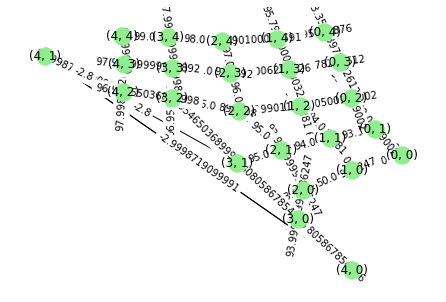

<Figure size 57600x43200 with 0 Axes>

In [21]:
G = nx.DiGraph()

for i in range(len(Q)):
    for j in range(len(Q[i])):
        for k in range(len(actions)):
            node1 = (i, j)
            action = actions[k]
            node2, reward = get_next_state_and_reward(node1, action)
            if node2[0] < 0 or node2[0] >= len(Q) or node2[1] < 0 or node2[1] >= len(Q[0]):
                continue
            if node2 == node1:
                continue
            G.add_edge(node1, node2, weight=reward + gamma * np.max(Q[node2[0]][node2[1]]))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.figure(figsize=(800,600))
plt.show()
